In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from glob import glob
import pandas as pd

In [2]:
json_path = './logs'

In [3]:
temp = [y for x in os.walk(json_path) for y in glob(os.path.join(x[0], '*.json'))]

In [4]:
temp.sort()
json_dir = temp

In [5]:
data = {}
for i in range(len(json_dir)):
    with open(json_dir[i]) as json_file:
        data[i] = json.load(json_file)
start_epi = 2

# Mean Score, Accuracy, and Loss along Trial

In [13]:
idx_name = {}
for i in range(len(data.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    idx_name[i] = label

In [18]:
"""
Total_statistics = {}
keys = ['Mean Accuracy', 'Acc Std', 'Mean Loss', 'Loss Std', 'Mean Score', 'Score Std']
Total_statistics = dict.fromkeys(keys, [])
"""
keys = ['Final Episode', 'Mean Score (Last 100 Epi)', 'Score Std (Last 100 Epi)']
Total_statistics = {}

for i in range(len(keys)):
    Total_statistics[keys[i]] = []




In [19]:
for i in range(len(data.keys())):
    Total_statistics[keys[0]].append(len(data[i]['score']))
    Total_statistics[keys[1]].append(data[i]['mean'][-1])
    Total_statistics[keys[2]].append(data[i]['mean'][-1])

In [20]:
TotalPd = pd.DataFrame(Total_statistics, columns=keys)

## Statistics

In [21]:
TotalPd.rename(index=idx_name)

,Final Episode,Mean Score (Last 100 Epi),Score Std (Last 100 Epi)
Default_T1,1000,171.00,171.00
Default_T2,369,196.90,196.90
Default_T3,211,195.84,195.84
Default_T4,1000,24.41,24.41
Default_T5,188,195.02,195.02


# Score along Episodes

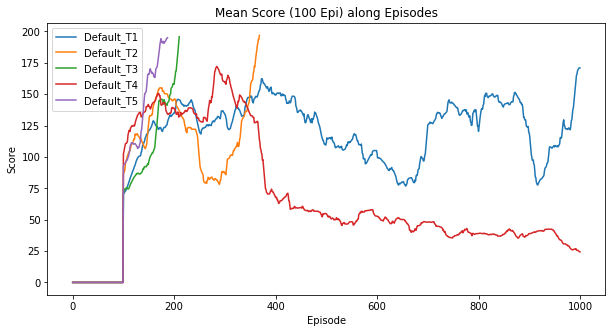

In [22]:
fig = plt.figure(figsize=(10,5))

for trial in range(len(data.keys())):
    label = json_dir[trial].split('history_')[-1].split('.')[0]
    plt.plot(data[trial]["mean"], label="{}".format(label))
    
plt.legend()
plt.title("Mean Score (100 Epi) along Episodes")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()